## IDEA:

## Men take longer Citi Bike trips in comparison with women.

## NULL HYPOTHESIS:

## The number of women taking longer trips on Citi Bike is the same or higher than the number of men taking Citi Bike trips.

Significance level  $\alpha=0.05$

## H0 = W(time of the trip) > = M(time of the trip)

## H1 = W(time of the trip) < M(time of the trip)

In [13]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
df = pd.read_csv('/home/cusp/el2666/PUI2016_el2666/Homework3/201502-citibike-tripdata.csv')

In [15]:

df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [16]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [17]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year'], axis=1, inplace=True)

In [18]:
df.head()

,tripduration,gender
0,801,2
1,379,1
2,2474,2
3,818,2
4,544,1


In [19]:
import matplotlib.pyplot as plt
x = [df['gender']]
y = [df['tripduration']]
x
y

[0          801
 1          379
 2         2474
 3          818
 4          544
 5          717
 6         1306
 7          913
 8          759
 9          585
 10         581
 11         204
 12        1169
 13         419
 14         527
 15        1013
 16         587
 17         525
 18         670
 19         711
 20        1559
 21         683
 22         522
 23         389
 24         276
 25         907
 26         946
 27         144
 28         257
 29         602
           ... 
 196900     178
 196901     152
 196902    1046
 196903     957
 196904     656
 196905     594
 196906     479
 196907     359
 196908    1028
 196909      83
 196910     528
 196911     218
 196912     579
 196913     457
 196914     672
 196915     504
 196916     394
 196917     169
 196918     252
 196919     804
 196920     407
 196921     113
 196922     509
 196923     281
 196924     870
 196925     747
 196926     204
 196927     675
 196928     651
 196929     636
 Name: tripduration, dty

In [20]:
dfGender = df['gender'].tolist()
dfTripDuration = df['tripduration'].tolist()

In [21]:
df.iloc[0:100]

,tripduration,gender
0,801,2
1,379,1
2,2474,2
3,818,2
4,544,1
5,717,1
6,1306,1
7,913,1
8,759,2
9,585,1


In [31]:
#dropping outlying trip duration values above 2000 seconds (the initial histogram plot showed it as outlying values)
df = df.drop(df[df.tripduration > 2000].index)

In [33]:
df.iloc[:100]

,tripduration,gender
0,801,2
1,379,1
3,818,2
4,544,1
5,717,1
6,1306,1
7,913,1
8,759,2
9,585,1
10,581,2


In [34]:
x_female = (df['gender'] == 2).iloc[0:100].tolist()

In [35]:
female = df['tripduration'][x_female]

/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/core/internals.py:227: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 193389 but corresponding boolean dimension is 100
  return self.values[slicer]
/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/pandas/indexes/base.py:1275: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 193389 but corresponding boolean dimension is 100
  result = getitem(key)


In [36]:
x_male = (df['gender'] == 1).iloc[0:
                                  100].tolist()

In [37]:
male = df['tripduration'][x_male]

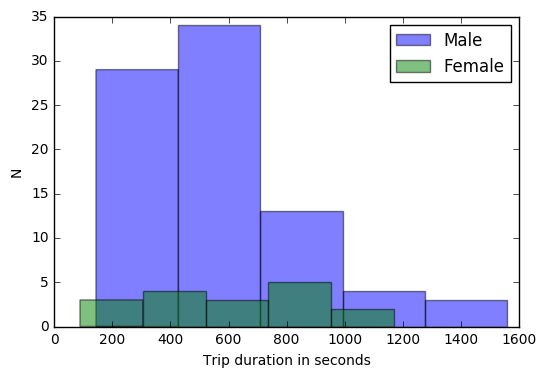

In [39]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

pylab.hist(male, bins=5, alpha=0.5, label = 'Male')
pylab.hist(female, bins=5, alpha=0.5, label = 'Female')
pylab.legend(loc='upper right')
plt.ylabel('N')
plt.xlabel('Trip duration in seconds')
pylab.show()

In [27]:
import scipy.stats as stats

In [29]:
stats.ttest_ind(male, female, axis=0, equal_var=True)

Ttest_indResult(statistic=-2.3441374756410727, pvalue=0.021110793194435314)

The t-test measures whether the average (expected) value differs significantly across samples. The p-value is smaller than 0.05, therefore we reject the null hypothesis that the number of women taking longer trips on Citi Bike is the same or higher than the number of men taking Citi Bike trips.
